In [22]:
import pandas as pd 
import math
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from scipy.optimize import curve_fit
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import binarize
from sklearn.model_selection import GridSearchCV
import warnings #had to supress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

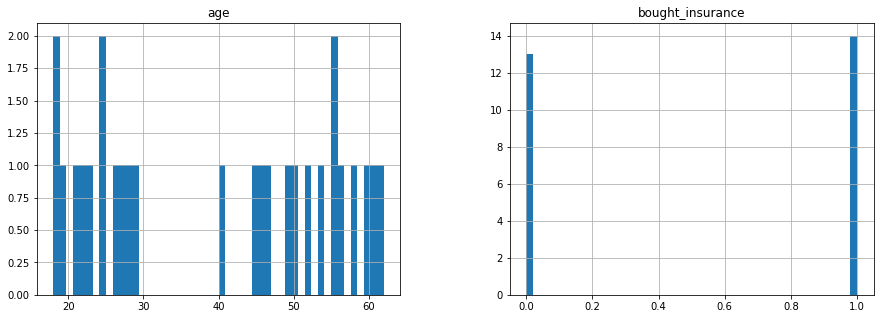

In [2]:
w = pd.read_csv(r'C:\Users\MHI6\Guido\Datasets\insurance_data.csv') 
w.hist(figsize=(15,5),bins=50)
X = w.iloc[:, 0].values.reshape(-1, 1)  #load the first two features of the iris data 
y = w.iloc[:, 1].values.reshape(-1, 1).ravel()  #load the target of the iris data

In [3]:
print(w.describe())

             age  bought_insurance
count  27.000000         27.000000
mean   39.666667          0.518519
std    15.745573          0.509175
min    18.000000          0.000000
25%    25.000000          0.000000
50%    45.000000          1.000000
75%    54.500000          1.000000
max    62.000000          1.000000


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
lr_clf = LogisticRegression(random_state = 0, C = 1000).fit(X_train, y_train)

In [19]:
lr_pred = lr_clf.predict(X_test)
lr_prob = lr_clf.predict_proba(X_test)

print ('Accuracy of LR:', accuracy_score(y_test,lr_pred))

Accuracy of LR: 1.0


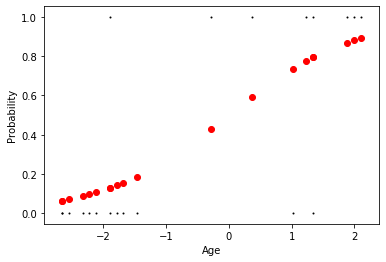

In [21]:
def model(x):
    return 1 / (1 + np.e**(-x))

loss = model(X_train * lr_clf.coef_ + lr_clf.intercept_)
plt.scatter(X_train * lr_clf.coef_ + lr_clf.intercept_, y_train, s = 1, color = 'black')
plt.scatter(X_train * lr_clf.coef_ + lr_clf.intercept_, loss, color = 'red')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.show()